In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("cities_by_gdp.csv")
df.head()

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population
0,1,A Coruña metropolitan area,Spain,28.819,"1,121,815"
1,2,Aachen,Germany,24.296,"249,070"
2,3,Aalborg,Denmark,31.855,"219,487"
3,4,Aarhus,Denmark,54.927,"352,751"
4,5,"Abbotsford, British Columbia",Canada,6.239,"203,907"


In [4]:
for i in df.columns:
    print(i)

#df.columns

Index
Metropolitian Area/City
Country/Region
Official est. GDP(billion US$)
Metropolitian Population


lets see the info about the data set

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Index                           903 non-null    int64 
 1   Metropolitian Area/City         903 non-null    object
 2   Country/Region                  903 non-null    object
 3   Official est. GDP(billion US$)  903 non-null    object
 4   Metropolitian Population        903 non-null    object
dtypes: int64(1), object(4)
memory usage: 35.4+ KB


lets see what we got here

In [6]:
df.shape

(903, 5)

let see if there is any na/null value

In [7]:
df.isna().sum()

Index                             0
Metropolitian Area/City           0
Country/Region                    0
Official est. GDP(billion US$)    0
Metropolitian Population          0
dtype: int64

see if there is any duplicate value/s

In [8]:
df.duplicated().sum()

0

In [9]:
df.head(20)

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population
0,1,A Coruña metropolitan area,Spain,28.819,"1,121,815"
1,2,Aachen,Germany,24.296,"249,070"
2,3,Aalborg,Denmark,31.855,"219,487"
3,4,Aarhus,Denmark,54.927,"352,751"
4,5,"Abbotsford, British Columbia",Canada,6.239,"203,907"
5,6,"Aberdeen, Scotland",United Kingdom,23.0,"489,840"
6,7,Abidjan,Ivory Coast,27,"5,600,000"
7,8,"Abilene, TX MSA",United States,9.469,"179,308"
8,9,Abu Dhabi metropolitan area,United Arab Emirates,151.073,"1,660,000"
9,10,Adelaide,Australia,64.461,"1,344,368"


in metropolitian population column we see 1,121,815 etc values, lets make them appear like 1.121.815 

In [10]:
def change_type(value):
    result = str(value).replace(',','.')
    return result

df['Metropolitian Population'] = df['Metropolitian Population'].apply(lambda x : change_type(x))

In [11]:
df.head(10)

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population
0,1,A Coruña metropolitan area,Spain,28.819,1.121.815
1,2,Aachen,Germany,24.296,249.070
2,3,Aalborg,Denmark,31.855,219.487
3,4,Aarhus,Denmark,54.927,352.751
4,5,"Abbotsford, British Columbia",Canada,6.239,203.907
5,6,"Aberdeen, Scotland",United Kingdom,23.0,489.840
6,7,Abidjan,Ivory Coast,27,5.600.000
7,8,"Abilene, TX MSA",United States,9.469,179.308
8,9,Abu Dhabi metropolitan area,United Arab Emirates,151.073,1.660.000
9,10,Adelaide,Australia,64.461,1.344.368


lets create two columns; metropolitian area and city column

In [12]:
# def split_column(get_area):
#     return str(get_area).split(',')[0]

# df['Metropolitian Area'] = df['Metropolitian Area/City'].apply(split_column)

# first lets create area and city columns at one then try to create the city code column.

In [13]:
df[['Metropolitian_Area','City']] = df['Metropolitian Area/City'].str.split(', ' , expand=True)

In [14]:
df.head()

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City
0,1,A Coruña metropolitan area,Spain,28.819,1.121.815,A Coruña metropolitan area,None
1,2,Aachen,Germany,24.296,249.070,Aachen,None
2,3,Aalborg,Denmark,31.855,219.487,Aalborg,None
3,4,Aarhus,Denmark,54.927,352.751,Aarhus,None
4,5,"Abbotsford, British Columbia",Canada,6.239,203.907,Abbotsford,British Columbia


In [15]:
df[df['Metropolitian_Area'] == 'Tyler'] # just checked on it on google if its true, its true!

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City
816,817,"Tyler, TX MSA",United States,14.729,241.922,Tyler,TX MSA


In [16]:
df.head()

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City
0,1,A Coruña metropolitan area,Spain,28.819,1.121.815,A Coruña metropolitan area,None
1,2,Aachen,Germany,24.296,249.070,Aachen,None
2,3,Aalborg,Denmark,31.855,219.487,Aalborg,None
3,4,Aarhus,Denmark,54.927,352.751,Aarhus,None
4,5,"Abbotsford, British Columbia",Canada,6.239,203.907,Abbotsford,British Columbia


lets see the None values in the city column

In [17]:
print("\nrows where the column has 'None' value in it:")

df[df['City'].isnull()]


rows where the column has 'None' value in it:


,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City
0,1,A Coruña metropolitan area,Spain,28.819,1.121.815,A Coruña metropolitan area,None
1,2,Aachen,Germany,24.296,249.070,Aachen,None
2,3,Aalborg,Denmark,31.855,219.487,Aalborg,None
3,4,Aarhus,Denmark,54.927,352.751,Aarhus,None
6,7,Abidjan,Ivory Coast,27,5.600.000,Abidjan,None
...,...,...,...,...,...,...,...
898,899,Zhenjiang,China,61.182,3.210.418,Zhenjiang,None
899,900,Zhuzhou,China,45.029,1.330.000,Zhuzhou,None
900,901,Zibo,China,53.260,4.704.138,Zibo,None
901,902,Zürich Metropolitan Area,Switzerland,158.913,1.430.000,Zürich Metropolitan Area,None


In [18]:
df_filtered = df[df['City'].notnull()]
df_filtered

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City
4,5,"Abbotsford, British Columbia",Canada,6.239,203.907,Abbotsford,British Columbia
5,6,"Aberdeen, Scotland",United Kingdom,23.0,489.840,Aberdeen,Scotland
7,8,"Abilene, TX MSA",United States,9.469,179.308,Abilene,TX MSA
12,13,"Akron, OH MSA",United States,44.562,697.627,Akron,OH MSA
13,14,"Albany-Lebanon, OR MSA",United States,6.108,130.467,Albany-Lebanon,OR MSA
...,...,...,...,...,...,...,...
887,888,"York-Hanover, PA MSA",United States,25.187,461.058,York-Hanover,PA MSA
888,889,"Youngstown-Warren-Boardman, OH-PA MSA",United States,24.990,535.499,Youngstown-Warren-Boardman,OH-PA MSA
889,890,"Yuba City, CA MSA",United States,8.608,182.813,Yuba City,CA MSA
891,892,"Yulin, Shaanxi",China,59.293,3.624.750,Yulin,Shaanxi


In [19]:
df_filtered['Country/Region'].unique()

array(['Canada', 'United Kingdom', 'United States', 'Germany', 'China'],
      dtype=object)

just tried to assign a unique identity

In [20]:
df['id'] = df.groupby(['Metropolitian_Area']).ngroup()

In [21]:
df.drop('id',axis=1, inplace=True)

In [22]:
df.head()

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City
0,1,A Coruña metropolitan area,Spain,28.819,1.121.815,A Coruña metropolitan area,None
1,2,Aachen,Germany,24.296,249.070,Aachen,None
2,3,Aalborg,Denmark,31.855,219.487,Aalborg,None
3,4,Aarhus,Denmark,54.927,352.751,Aarhus,None
4,5,"Abbotsford, British Columbia",Canada,6.239,203.907,Abbotsford,British Columbia


lets change the name of Turkey to Türkiye :) 

In [23]:
df['Country/Region'] = df['Country/Region'].replace('Turkey','Türkiye')

In [24]:
df[df['Country/Region'] == 'Türkiye']

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City
31,32,Ankara,Türkiye,74.83,5.150.000,Ankara,None
119,120,Bursa,Türkiye,33.641,3.101.833,Bursa,None
368,369,Istanbul metropolitan area,Türkiye,275.365,16.500.000,Istanbul metropolitan area,None
370,371,İzmir,Türkiye,51.460,3.050.000,İzmir,None


now delete the metropolitian area part from regardless column

In [25]:
df['Metropolitian_Area'] = df['Metropolitian_Area'].str.replace('metropolitan area','')

In [26]:
df.head(25)

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City
0,1,A Coruña metropolitan area,Spain,28.819,1.121.815,A Coruña,None
1,2,Aachen,Germany,24.296,249.070,Aachen,None
2,3,Aalborg,Denmark,31.855,219.487,Aalborg,None
3,4,Aarhus,Denmark,54.927,352.751,Aarhus,None
4,5,"Abbotsford, British Columbia",Canada,6.239,203.907,Abbotsford,British Columbia
5,6,"Aberdeen, Scotland",United Kingdom,23.0,489.840,Aberdeen,Scotland
6,7,Abidjan,Ivory Coast,27,5.600.000,Abidjan,None
7,8,"Abilene, TX MSA",United States,9.469,179.308,Abilene,TX MSA
8,9,Abu Dhabi metropolitan area,United Arab Emirates,151.073,1.660.000,Abu Dhabi,None
9,10,Adelaide,Australia,64.461,1.344.368,Adelaide,None


we see some blanks or space character remained at the end of the value, after replacing now lets get rid of them

In [27]:
df[df['Metropolitian_Area'] == 'Alicante'] # we can't get the info when we have the value in this way

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City


In [28]:
df[df['Metropolitian_Area'] == 'Alicante '] # but in this way, we can see it.

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City
19,20,Alicante metropolitan area,Spain,38.851,1.915.282,Alicante,None


In [29]:
df['Metropolitian_Area'] = df['Metropolitian_Area'].str.strip(' ')

In [30]:
df[df['Metropolitian_Area'] == 'Alicante'] # now we can see it

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City
19,20,Alicante metropolitan area,Spain,38.851,1.915.282,Alicante,None


In [31]:
df.head()

,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City
0,1,A Coruña metropolitan area,Spain,28.819,1.121.815,A Coruña,None
1,2,Aachen,Germany,24.296,249.070,Aachen,None
2,3,Aalborg,Denmark,31.855,219.487,Aalborg,None
3,4,Aarhus,Denmark,54.927,352.751,Aarhus,None
4,5,"Abbotsford, British Columbia",Canada,6.239,203.907,Abbotsford,British Columbia


In [32]:
df.rename(columns={'Country/Region': 'Country'},inplace=True)

In [33]:
df.head()

,Index,Metropolitian Area/City,Country,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City
0,1,A Coruña metropolitan area,Spain,28.819,1.121.815,A Coruña,None
1,2,Aachen,Germany,24.296,249.070,Aachen,None
2,3,Aalborg,Denmark,31.855,219.487,Aalborg,None
3,4,Aarhus,Denmark,54.927,352.751,Aarhus,None
4,5,"Abbotsford, British Columbia",Canada,6.239,203.907,Abbotsford,British Columbia


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Index                           903 non-null    int64 
 1   Metropolitian Area/City         903 non-null    object
 2   Country                         903 non-null    object
 3   Official est. GDP(billion US$)  903 non-null    object
 4   Metropolitian Population        903 non-null    object
 5   Metropolitian_Area              903 non-null    object
 6   City                            400 non-null    object
dtypes: int64(1), object(6)
memory usage: 49.5+ KB


In [35]:
df_copy = df.copy()

In [36]:
df_copy.head()

,Index,Metropolitian Area/City,Country,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City
0,1,A Coruña metropolitan area,Spain,28.819,1.121.815,A Coruña,None
1,2,Aachen,Germany,24.296,249.070,Aachen,None
2,3,Aalborg,Denmark,31.855,219.487,Aalborg,None
3,4,Aarhus,Denmark,54.927,352.751,Aarhus,None
4,5,"Abbotsford, British Columbia",Canada,6.239,203.907,Abbotsford,British Columbia


In [37]:
print(type(df['Metropolitian_Area']))

<class 'pandas.core.series.Series'>


In [38]:
def change(value2):
    result = str(value2).replace(',','.')
    return result

df['Official est. GDP(billion US$)'] = df['Official est. GDP(billion US$)'].apply(lambda x : change_type(x))

In [39]:
df.head(15)

,Index,Metropolitian Area/City,Country,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City
0,1,A Coruña metropolitan area,Spain,28.819,1.121.815,A Coruña,None
1,2,Aachen,Germany,24.296,249.070,Aachen,None
2,3,Aalborg,Denmark,31.855,219.487,Aalborg,None
3,4,Aarhus,Denmark,54.927,352.751,Aarhus,None
4,5,"Abbotsford, British Columbia",Canada,6.239,203.907,Abbotsford,British Columbia
5,6,"Aberdeen, Scotland",United Kingdom,23.0,489.840,Aberdeen,Scotland
6,7,Abidjan,Ivory Coast,27,5.600.000,Abidjan,None
7,8,"Abilene, TX MSA",United States,9.469,179.308,Abilene,TX MSA
8,9,Abu Dhabi metropolitan area,United Arab Emirates,151.073,1.660.000,Abu Dhabi,None
9,10,Adelaide,Australia,64.461,1.344.368,Adelaide,None


In [40]:
df['Metropolitian Population'] = df['Metropolitian Population'].str.strip(' ')

in order to do some visualize lets convert gdp and population columns into float and int type

In [41]:
df['Official est. GDP(billion US$)'] = df['Official est. GDP(billion US$)'].str.replace('.','').astype('float')

df['Metropolitian Population'] = df['Metropolitian Population'].str.replace('.','').astype('int64')

/var/folders/4c/qsq564456sj39672nctb1blh0000gn/T/ipykernel_6382/2226815326.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Official est. GDP(billion US$)'] = df['Official est. GDP(billion US$)'].str.replace('.','').astype('float')
/var/folders/4c/qsq564456sj39672nctb1blh0000gn/T/ipykernel_6382/2226815326.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Metropolitian Population'] = df['Metropolitian Population'].str.replace('.','').astype('int64')


In [42]:
df.head(15)

,Index,Metropolitian Area/City,Country,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City
0,1,A Coruña metropolitan area,Spain,28819.0,1121815,A Coruña,None
1,2,Aachen,Germany,24296.0,249070,Aachen,None
2,3,Aalborg,Denmark,31855.0,219487,Aalborg,None
3,4,Aarhus,Denmark,54927.0,352751,Aarhus,None
4,5,"Abbotsford, British Columbia",Canada,6239.0,203907,Abbotsford,British Columbia
5,6,"Aberdeen, Scotland",United Kingdom,230.0,489840,Aberdeen,Scotland
6,7,Abidjan,Ivory Coast,27.0,5600000,Abidjan,None
7,8,"Abilene, TX MSA",United States,9469.0,179308,Abilene,TX MSA
8,9,Abu Dhabi metropolitan area,United Arab Emirates,151073.0,1660000,Abu Dhabi,None
9,10,Adelaide,Australia,64461.0,1344368,Adelaide,None


lets see the top five country that has the highest gdp

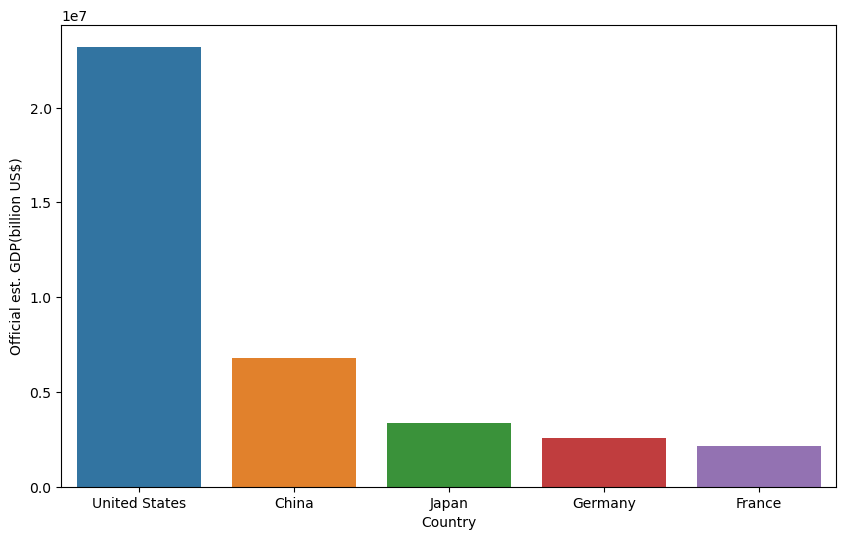

In [43]:
x = df.groupby('Country')['Official est. GDP(billion US$)'].sum().reset_index().sort_values(by='Official est. GDP(billion US$)',
                                                                                        ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(data= x , x = 'Country' , y = 'Official est. GDP(billion US$)')

plt.show()


lets see the top ten countries and their areas that has the highest gdp

In [44]:
country = df.groupby(['Country','Metropolitian_Area'])['Official est. GDP(billion US$)'].sum().reset_index()
sorted = country.sort_values(by=['Official est. GDP(billion US$)'],ascending=False).head(10)
sorted
#sorted[sorted['Country'] == 'United States'].sum()

,Country,Metropolitian_Area,Official est. GDP(billion US$)
753,United States,New York–Newark,2163208.0
361,Japan,Greater Tokyo Area,2080758.0
809,United States,San Jose-San Francisco–Oakland,1383000.0
716,United States,Los Angeles–Long Beach,1227469.0
514,United Kingdom,London,978402.0
249,France,Paris,934168.0
457,South Korea,Seoul Capital Area,878535.0
583,United States,Chicago–Naperville,832899.0
366,Japan,Kyoto–Osaka–Kobe,699474.0
598,United States,Dallas-Fort Worth-Arlington,688928.0


try to visualize the above dataframe with subplots

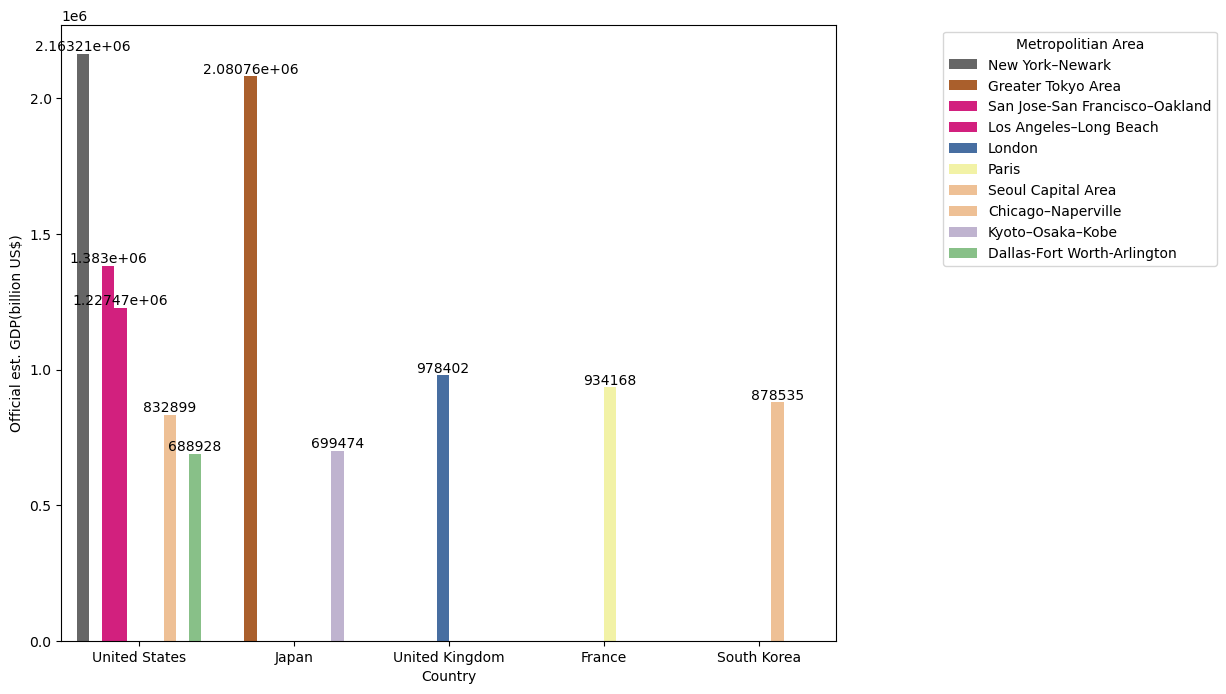

In [45]:
plt.figure(figsize=(10,8))


x = sns.barplot(data = sorted , x = 'Country' , y = 'Official est. GDP(billion US$)',hue = 'Metropolitian_Area',palette='Accent_r')

for container in x.containers:
     x.bar_label(container)

plt.legend(title='Metropolitian Area', loc='best', bbox_to_anchor=(1.5,1))
plt.show()


or we can display two graphs at the same time

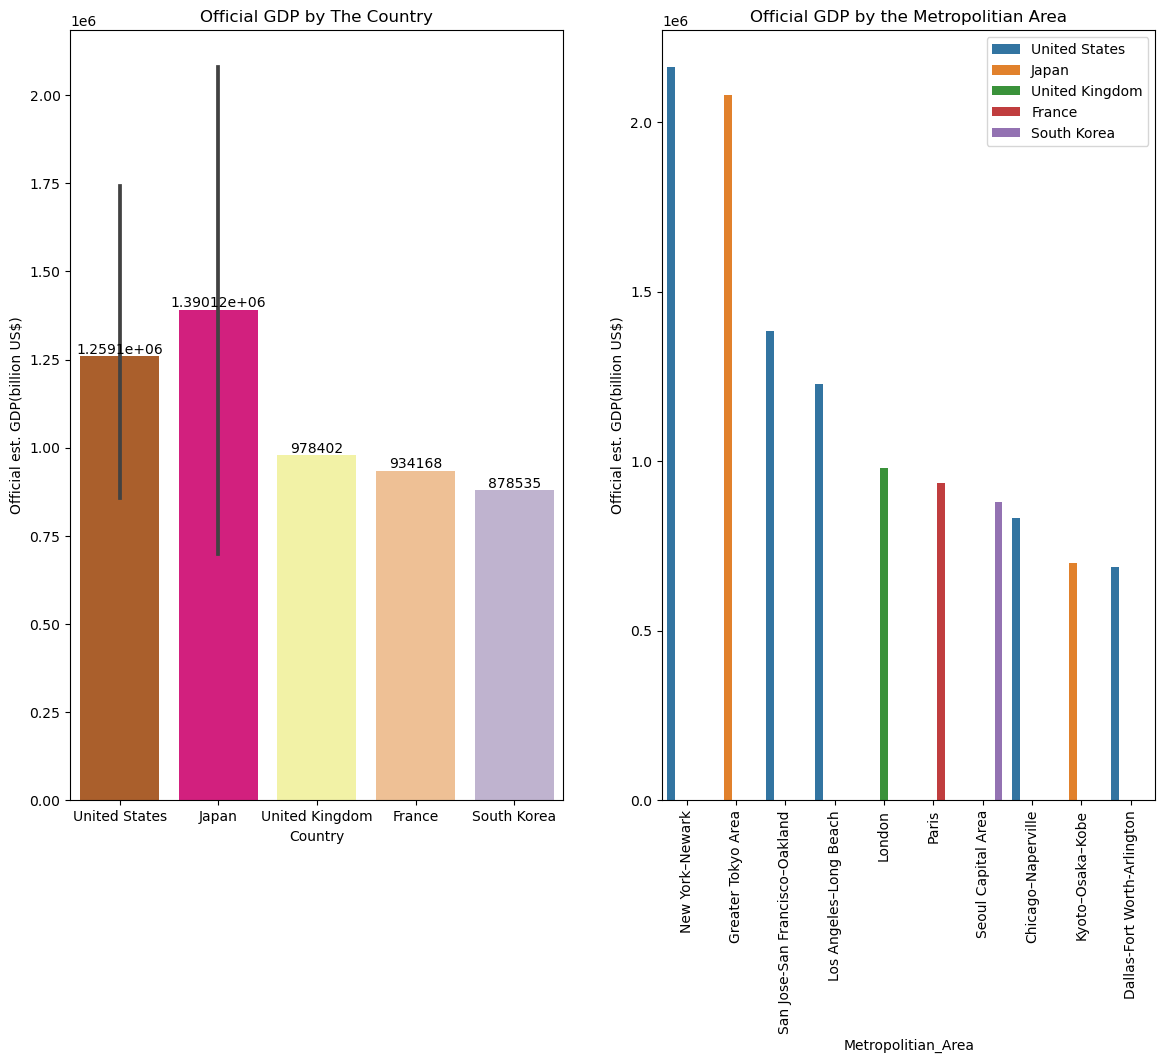

In [46]:
fix , ax = plt.subplots(1,2,figsize=(14,10))

sorted_df = sorted.sort_values(by='Official est. GDP(billion US$)', ascending=False)

# first graph
ax[0] = sns.barplot(data = sorted_df , x = 'Country' , y = 'Official est. GDP(billion US$)',palette='Accent_r', ax = ax[0])
ax[0].set(title='Official GDP by The Country')
plt.xticks(rotation=90)

# first graph est gdp values
for container in ax[0].containers:
      ax[0].bar_label(container)

#sort_values(by='Metropolitian_Area',ascending=False)
#ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc:"{:,}".format(int(x))))

# second graph
ax[1] = sns.barplot(data=sorted_df.sort_values(by='Official est. GDP(billion US$)', ascending=False) , x = 'Metropolitian_Area', y = 'Official est. GDP(billion US$)' , ax = ax[1]
                    ,hue='Country')

ax[1].set(title='Official GDP by the Metropolitian Area')
plt.legend(loc='upper right')
plt.show()


In the first graph, despite the above DF, we see that Japan got a higher value than the US, but in the DF, we see the other way around. The reason is that the that the total GDP of Japan is way higher than the US when we look at it cumulatively. You can check the below codes to see clearly

In [47]:
df[df['Country'] == 'United States'].groupby('Country')['Official est. GDP(billion US$)'].sum()

Country
United States    23213198.0
Name: Official est. GDP(billion US$), dtype: float64

In [48]:
df[df['Country'] == 'Japan'].groupby('Country')['Official est. GDP(billion US$)'].sum()

Country
Japan    3346988.0
Name: Official est. GDP(billion US$), dtype: float64

let's see the city with the highes population

In [49]:
cities_w_hpopulation = df.groupby('Metropolitian_Area')['Metropolitian Population'].sum().reset_index()
sorted_cities = cities_w_hpopulation.sort_values(by='Metropolitian Population',ascending=False).head(5)
sorted_cities

,Metropolitian_Area,Metropolitian Population
298,Greater Tokyo Area,40700000
363,Jakarta,34307088
546,National Capital Region (Delhi),31300000
293,Greater Manila Area,26400000
707,Shanghai,24890106


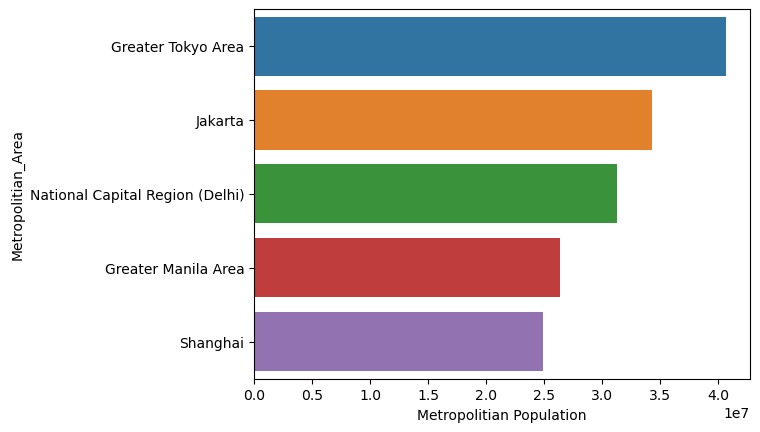

In [50]:
sns.barplot(data=sorted_cities , y = 'Metropolitian_Area', x = 'Metropolitian Population')
plt.show()

let's see the country with the highes population

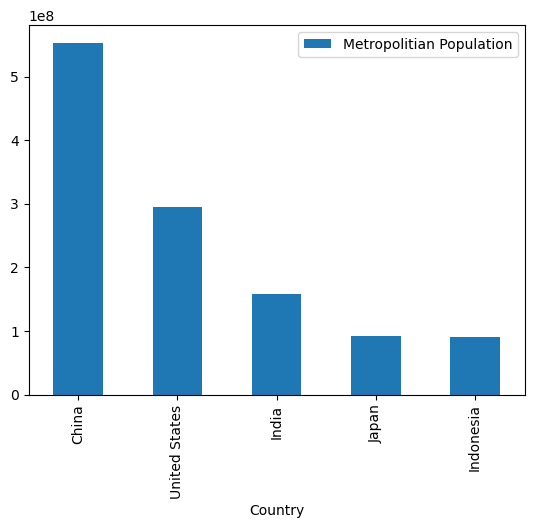

In [51]:
pop_highest_country = df.groupby('Country')['Metropolitian Population'].agg(sum).reset_index().nlargest(5,columns='Metropolitian Population')
pop_highest_country.plot(kind='bar', x = 'Country', y = 'Metropolitian Population')
plt.show()

In [52]:
df.head()

,Index,Metropolitian Area/City,Country,Official est. GDP(billion US$),Metropolitian Population,Metropolitian_Area,City
0,1,A Coruña metropolitan area,Spain,28819.0,1121815,A Coruña,None
1,2,Aachen,Germany,24296.0,249070,Aachen,None
2,3,Aalborg,Denmark,31855.0,219487,Aalborg,None
3,4,Aarhus,Denmark,54927.0,352751,Aarhus,None
4,5,"Abbotsford, British Columbia",Canada,6239.0,203907,Abbotsford,British Columbia


lets export cleaned data set to do some analysis in pgadmin tool

In [53]:
df.to_csv('CountryGDP.csv',index=False)

to do some analysis in your sql let's connect your database but before do that, create a table along with above exported cvs columns.

In [54]:
from sqlalchemy import create_engine

In [55]:
database_type = 'postgresql' # Change this to your database type
username = '##'  # your user name
password = '##' # your db password
host = '###'  # host number
port = '###' # port number
database_name = '###' # db name that has your created table in

In [77]:
connection_string = f"{'postgresql'}://{'postgres'}:{'123456'}@{'127.0.0.1'}:{'5432'}/{'test'}"
# adjust with your own info

In [78]:
engine = create_engine(connection_string)

check if its working

I've already created my table, which was "gdp," and to fill in my columns, I used an exported cvs file, which was the 'CountryGDP.csv' file.

In [107]:
query = "select * from gdp"
abc = pd.read_sql(query,engine)
abc

,id,metropolitian_area_city,country,gdp,metropolitian_population,metropolitian_area,cities
0,164,Chuzhou,China,43960.0,3937868.0,Chuzhou,None
1,458,Lhasa,China,9832.0,867891.0,Lhasa,None
2,1,A Coruña metropolitan area,Spain,28819.0,1121815.0,A Coruña,None
3,2,Aachen,Germany,24296.0,249070.0,Aachen,None
4,3,Aalborg,Denmark,31855.0,219487.0,Aalborg,None
...,...,...,...,...,...,...,...
898,899,Zhenjiang,China,61182.0,3210418.0,Zhenjiang,None
899,900,Zhuzhou,China,45029.0,1330000.0,Zhuzhou,None
900,901,Zibo,China,53260.0,4704138.0,Zibo,None
901,902,Zürich Metropolitan Area,Switzerland,158913.0,1430000.0,Zürich Metropolitan Area,None


### lets find the country that has the highest cumulative gdp

In [105]:
q1 = "select country, sum(gdp) over(partition by country) as total_gdp from gdp order by total_gdp desc limit 1"
highest_gdp = pd.read_sql(q1,engine)
highest_gdp

,country,total_gdp
0,United States,23213198.0


### lets write a functions that will return the country along with its gdp, metropolitian population and area

In [154]:
q2 =  """
create or replace function gdp_population_per_country(p_country varchar(50)) 
returns table(country varchar(100),metropolitian_area varchar(500),gdp double precision, metropolitian_population double precision)
language 'plpgsql' 
as $$ 
begin 
    return query 
    select g.country, g.metropolitian_area,g.gdp, g.metropolitian_population 
    from gdp g
    where g.country ILIKE p_country
    order by g.gdp DESC;
end;
$$;
"""

# if it throwns an error, you'll see what that is:
try:
    with engine.connect() as connection:
        connection.execute(q2)
    print("Function has been created")
except Exception as e:
    print(f"An error occured: {e}")

Function has been created


In [163]:
# used same structure above to check if it throwns an error
try:
    func = "select * from gdp_population_per_country('United States')"
    res = pd.read_sql(func,engine)
    print(f"Query has been returned successfully ; '{func}' ")
except Exception as e:
    print(f"An error occured while fetching {e}")

res

Query has been returned successfully ; 'select * from gdp_population_per_country('United States')' 


,country,metropolitian_area,gdp,metropolitian_population
0,United States,New York–Newark,2163208.0,21914996.0
1,United States,San Jose-San Francisco–Oakland,1383000.0,6518123.0
2,United States,Los Angeles–Long Beach,1227469.0,18372485.0
3,United States,Chicago–Naperville,832899.0,9806184.0
4,United States,Dallas-Fort Worth-Arlington,688928.0,7943685.0
...,...,...,...,...
377,United States,Grants Pass,3658.0,87730.0
378,United States,Lewiston,3641.0,65512.0
379,United States,Gadsden,3489.0,103088.0
380,United States,Enid,3319.0,61920.0


what's the top five countries that has the highest gdp ever

In [180]:
try: 
    q3 = """
        select country,sum(gdp)
        from gdp
        group by country
        order by sum(gdp) DESC
        limit 5
    """
    result = pd.read_sql(q3,engine)
    print(f"Query returned")
except Exception as e:
    print(f"An error occured; {e}")

result

Query returned


,country,sum
0,United States,23213198.0
1,China,6773267.0
2,Japan,3346988.0
3,Germany,2594277.0
4,France,2170225.0


which country has the lowest gdp

In [216]:
abc = """
        select country
        , gdp
        , sum(gdp) over(partition by country) as total_gdp_per_country
        from gdp
        group by country,gdp
        order by 3 
        limit 1
    """ 
redeem = pd.read_sql(abc,engine)
redeem

,country,gdp,total_gdp_per_country
0,Tokelau,9.0,9.0


which cities have the lowest population and the highest population. return them as one table along with the columns; metropolitian_area_city, metropolitian_population, cities

In [237]:
try:
    table = """
            (select metropolitian_area_city
            , metropolitian_population
            , cities
            from gdp
            where cities not like 'None'
            order by 2
            limit 1)
            union all
            (select metropolitian_area_city
            , metropolitian_population
            , cities
            from gdp
            where cities not like 'None'
            order by 2 DESC
            limit 1)
        """
    eng = pd.read_sql(table,engine)
    print("Query returned")
except Exception as e:
    print(f"Error occured {e}")

eng

Query returned


,metropolitian_area_city,metropolitian_population,cities
0,"Carson City, NV MSA",58130.0,NV
1,"New York–Newark, NY-NJ-CT-PA CSA",21914996.0,NY-NJ-CT-PA CSA
